In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'

df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
2014-11-06 00:00:00+00:00,24.233503,27.174999,27.197500,26.950001,27.150000,139874000
2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262489,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456451,27.424999,27.437500,27.100000,27.174999,109769200
...,...,...,...,...,...,...
2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900


# 2. Data Exploration & Visualization

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2516, 6)

In [5]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [6]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,91.058820,93.086863,94.005953,92.078379,93.014297,1.192494e+08
std,63.746493,63.237283,63.844768,62.561998,63.186219,6.868630e+07
min,20.720032,22.584999,22.917500,22.367500,22.500000,2.404830e+07
25%,33.676707,36.028124,36.271876,35.838749,36.053125,7.334385e+07
50%,59.229193,61.045000,62.236250,59.952499,61.158749,1.022806e+08
75%,148.308434,150.172497,151.439995,148.295002,149.802502,1.454744e+08
max,236.479996,236.479996,237.490005,234.449997,236.479996,6.488252e+08


In [7]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [8]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
2014-11-06 00:00:00+00:00,24.233503,27.174999,27.197500,26.950001,27.150000,139874000
2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
2014-11-10 00:00:00+00:00,24.262489,27.207500,27.332500,27.167500,27.254999,108782000
2014-11-11 00:00:00+00:00,24.456451,27.424999,27.437500,27.100000,27.174999,109769200


In [9]:
df = df.reset_index()

In [10]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600
1,2014-11-06 00:00:00+00:00,24.233503,27.174999,27.197500,26.950001,27.150000,139874000
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000
3,2014-11-10 00:00:00+00:00,24.262489,27.207500,27.332500,27.167500,27.254999,108782000
4,2014-11-11 00:00:00+00:00,24.456451,27.424999,27.437500,27.100000,27.174999,109769200


Text(0, 0.5, 'Closed Price')

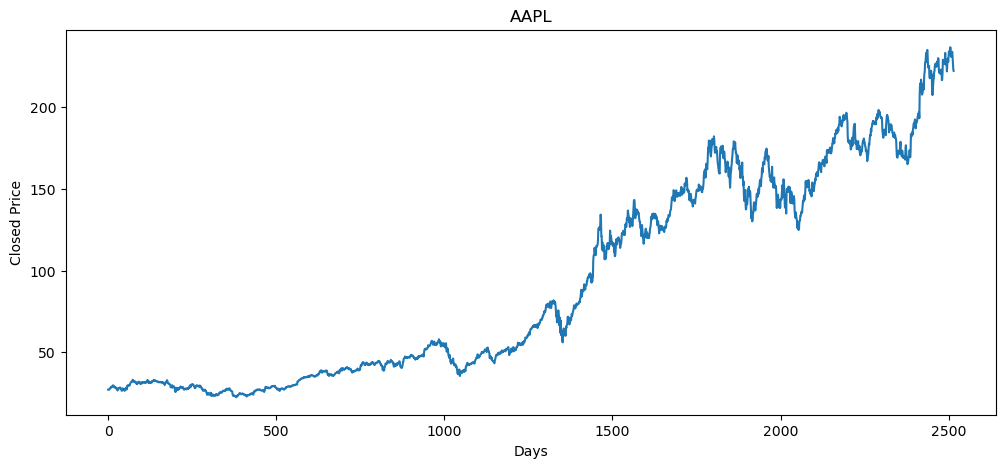

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Closed Price')

# 3. Feature Engineering

In [12]:
temp_df = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [13]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [14]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [15]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN
1,2014-11-06 00:00:00+00:00,24.233503,27.174999,27.197500,26.950001,27.150000,139874000,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN
3,2014-11-10 00:00:00+00:00,24.262489,27.207500,27.332500,27.167500,27.254999,108782000,NaN
4,2014-11-11 00:00:00+00:00,24.456451,27.424999,27.437500,27.100000,27.174999,109769200,NaN
...,...,...,...,...,...,...,...,...
98,2015-03-30 00:00:00+00:00,28.284033,31.592501,31.600000,31.000000,31.012501,188398800,NaN
99,2015-03-31 00:00:00+00:00,27.849823,31.107500,31.622499,31.090000,31.522499,168362400,29.437175
100,2015-04-01 00:00:00+00:00,27.809528,31.062500,31.280001,30.775000,31.205000,162485600,29.475650


Text(0, 0.5, 'Price')

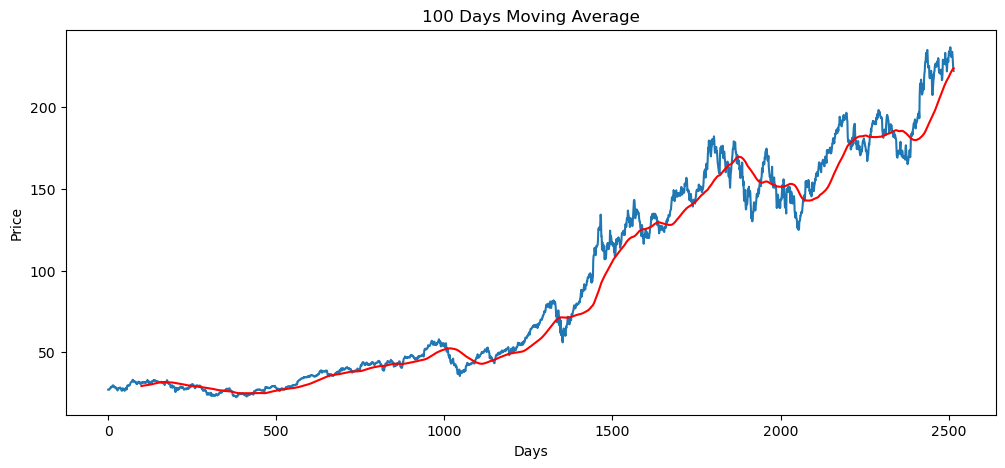

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### 200 days Moving Average

In [17]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN,NaN
1,2014-11-06 00:00:00+00:00,24.233503,27.174999,27.197500,26.950001,27.150000,139874000,NaN,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN,NaN
3,2014-11-10 00:00:00+00:00,24.262489,27.207500,27.332500,27.167500,27.254999,108782000,NaN,NaN
4,2014-11-11 00:00:00+00:00,24.456451,27.424999,27.437500,27.100000,27.174999,109769200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,2015-08-20 00:00:00+00:00,25.433153,28.162500,28.587500,27.907499,28.520000,274006400,31.404800,NaN
199,2015-08-21 00:00:00+00:00,23.877590,26.440001,27.975000,26.412500,27.607500,513102000,31.358125,30.397650
200,2015-08-24 00:00:00+00:00,23.281548,25.780001,27.200001,23.000000,23.717501,648825200,31.305300,30.390475


Text(0, 0.5, 'Price')

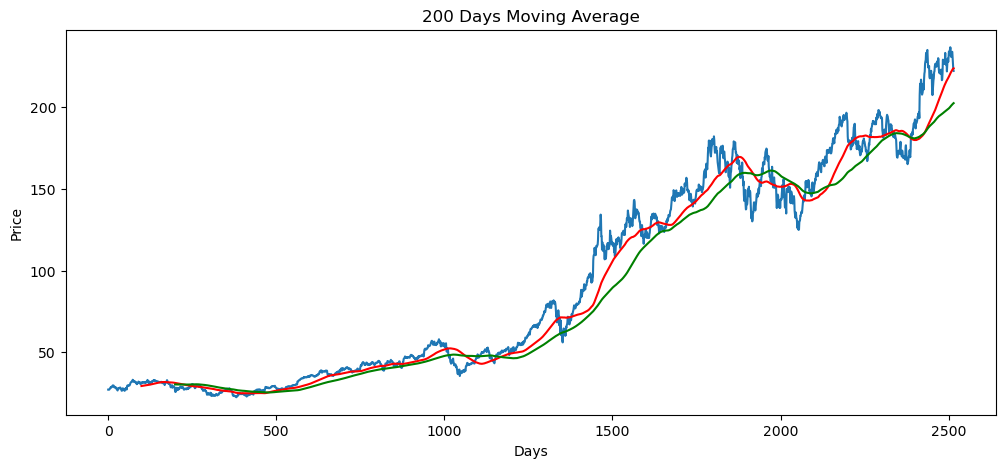

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [19]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-11-05 00:00:00+00:00,24.164396,27.215000,27.325001,27.032499,27.275000,149743600,NaN,NaN
1,2014-11-06 00:00:00+00:00,24.233503,27.174999,27.197500,26.950001,27.150000,139874000,NaN,NaN
2,2014-11-07 00:00:00+00:00,24.302614,27.252501,27.330000,27.137501,27.187500,134766000,NaN,NaN
3,2014-11-10 00:00:00+00:00,24.262489,27.207500,27.332500,27.167500,27.254999,108782000,NaN,NaN
4,2014-11-11 00:00:00+00:00,24.456451,27.424999,27.437500,27.100000,27.174999,109769200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2511,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200,222.679200,201.53255
2512,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900,223.011300,201.76490
2513,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100,223.339200,201.98105


### Calculating % changed in each trading session

In [20]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,27.215000,NaN
1,27.174999,-0.001470
2,27.252501,0.002852
3,27.207500,-0.001651
4,27.424999,0.007994
...,...,...
2511,233.669998,0.001157
2512,230.100006,-0.015278
2513,225.910004,-0.018209


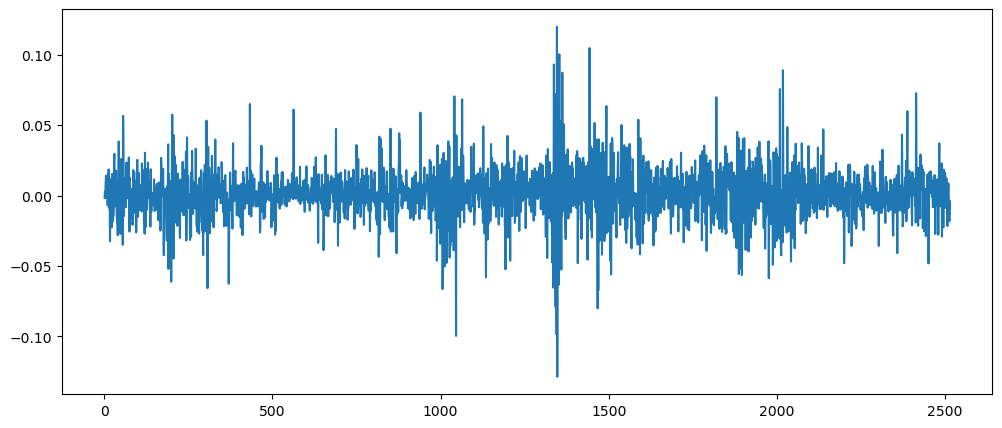

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [23]:
df.shape

(2516, 10)

In [26]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        27.215000
1        27.174999
2        27.252501
3        27.207500
4        27.424999
...            ...
1756    148.850006
1757    152.570007
1758    149.800003
1759    148.960007
1760    150.020004

[1761 rows x 1 columns]
Ticker        AAPL
1761    151.490005
1762    150.960007
1763    151.279999
1764    150.440002
1765    150.809998
...            ...
2511    233.669998
2512    230.100006
2513    225.910004
2514    222.910004
2515    222.009995

[755 rows x 1 columns]


In [27]:
data_training

Ticker,AAPL
0,27.215000
1,27.174999
2,27.252501
3,27.207500
4,27.424999
...,...
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007


In [28]:
data_testing

Ticker,AAPL
1761,151.490005
1762,150.960007
1763,151.279999
1764,150.440002
1765,150.809998
...,...
2511,233.669998
2512,230.100006
2513,225.910004
2514,222.910004


# Scaling down the data between 0 and 1

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03452519],
       [0.03422691],
       [0.03480483],
       ...,
       [0.94862235],
       [0.94235863],
       [0.95026287]])

In [31]:
type(data_training_array)

numpy.ndarray

In [37]:
data_training_array.shape

(1761, 1)

# 5. Sequence Creation

In [44]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train

array([[[0.03452519],
        [0.03422691],
        [0.03480483],
        ...,
        [0.06135119],
        [0.06716753],
        [0.06355095]],

       [[0.03422691],
        [0.03480483],
        [0.03446927],
        ...,
        [0.06716753],
        [0.06355095],
        [0.0632154 ]],

       [[0.03480483],
        [0.03446927],
        [0.03609112],
        ...,
        [0.06355095],
        [0.0632154 ],
        [0.0652101 ]],

       ...,

       [[0.77957567],
        [0.77196972],
        [0.78121619],
        ...,
        [0.9450431 ],
        [0.94153838],
        [0.96927784]],

       [[0.77196972],
        [0.78121619],
        [0.80455609],
        ...,
        [0.94153838],
        [0.96927784],
        [0.94862235]],

       [[0.78121619],
        [0.80455609],
        [0.79829237],
        ...,
        [0.96927784],
        [0.94862235],
        [0.94235863]]])

In [46]:
x_train.ndim

3

In [47]:
y_train.ndim

1

In [49]:
y_train.shape

(1661,)

In [50]:
x_train.shape

(1661, 100, 1)

# 6. Model Building

In [52]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [53]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [55]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0338
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 5.0170e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.1014e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 4.6696e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 4.2644e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.2330e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.8946e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.8751e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.1705e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.1951e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.3077e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 3.1842e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.2638e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.1385e-04
Epoch 15/50
52/52 ━

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [59]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [61]:
data_training

Ticker,AAPL
0,27.215000
1,27.174999
2,27.252501
3,27.207500
4,27.424999
...,...
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007


In [62]:
data_testing

Ticker,AAPL
1761,151.490005
1762,150.960007
1763,151.279999
1764,150.440002
1765,150.809998
...,...
2511,233.669998
2512,230.100006
2513,225.910004
2514,222.910004


In [63]:
past_100_days = data_training.tail(100)

In [64]:
past_100_days

Ticker,AAPL
1661,130.479996
1662,129.639999
1663,130.149994
1664,131.789993
1665,130.460007
...,...
1756,148.850006
1757,152.570007
1758,149.800003
1759,148.960007


In [67]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,130.479996
1,129.639999
2,130.149994
3,131.789993
4,130.460007
...,...
850,233.669998
851,230.100006
852,225.910004
853,222.910004


In [68]:
input_data = scaler.fit_transform(final_df)
input_data

array([[4.89861756e-02],
       [4.14498725e-02],
       [4.60254557e-02],
       [6.07392490e-02],
       [4.88068376e-02],
       [6.53149692e-02],
       [8.03875754e-02],
       [7.78754744e-02],
       [7.52737044e-02],
       [7.25821284e-02],
       [8.75650656e-02],
       [1.01471427e-01],
       [1.07123723e-01],
       [1.09904968e-01],
       [1.34039209e-01],
       [1.52521153e-01],
       [1.75399344e-01],
       [1.63466795e-01],
       [1.80244071e-01],
       [1.74771250e-01],
       [1.84999129e-01],
       [2.16490198e-01],
       [2.10479089e-01],
       [1.91728000e-01],
       [1.56378974e-01],
       [1.89574712e-01],
       [1.82845841e-01],
       [1.95406483e-01],
       [2.11196852e-01],
       [2.15054809e-01],
       [1.95137339e-01],
       [1.79077689e-01],
       [1.84999129e-01],
       [1.86972942e-01],
       [1.83922553e-01],
       [2.00430685e-01],
       [1.96752202e-01],
       [1.97739109e-01],
       [1.89485043e-01],
       [1.89036424e-01],


In [69]:
input_data.shape

(855, 1)

In [70]:
x_test = []
y_test = []

for i in range(100, int(input_data.shape[0])):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [71]:
x_test, y_test = np.array(x_test), np.array(y_test)

# 9. Making Predictions

In [73]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [74]:
y_predicted

array([[0.22541088],
       [0.22896956],
       [0.23189196],
       [0.23466629],
       [0.23436499],
       [0.23397933],
       [0.2260351 ],
       [0.21745372],
       [0.21642944],
       [0.21855192],
       [0.22401844],
       [0.23587199],
       [0.25869662],
       [0.28667077],
       [0.30976954],
       [0.3251755 ],
       [0.33434173],
       [0.32332247],
       [0.31825528],
       [0.33083925],
       [0.34428507],
       [0.35119885],
       [0.34804466],
       [0.35249674],
       [0.3754672 ],
       [0.40982512],
       [0.4356402 ],
       [0.46579295],
       [0.4744836 ],
       [0.46839377],
       [0.47497097],
       [0.45976532],
       [0.43967912],
       [0.42007193],
       [0.4172213 ],
       [0.42928198],
       [0.44491053],
       [0.47013292],
       [0.4866128 ],
       [0.49497527],
       [0.49351636],
       [0.4869701 ],
       [0.4953051 ],
       [0.49745235],
       [0.48150218],
       [0.4561278 ],
       [0.4367992 ],
       [0.425

In [75]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [76]:
y_predicted

array([150.1443 , 150.54094, 150.86668, 151.1759 , 151.14232, 151.09933,
       150.21387, 149.25739, 149.14322, 149.37979, 149.98909, 151.31029,
       153.85432, 156.97232, 159.5469 , 161.26405, 162.28574, 161.05753,
       160.49274, 161.89534, 163.39401, 164.16463, 163.81305, 164.30928,
       166.86957, 170.6991 , 173.57645, 176.93729, 177.90594, 177.22717,
       177.96025, 176.26544, 174.02663, 171.84122, 171.52348, 172.86777,
       174.60973, 177.42102, 179.25786, 180.18994, 180.02733, 179.29768,
       180.2267 , 180.46603, 178.68823, 175.86   , 173.70563, 172.48598,
       173.02544, 174.16953, 174.01035, 173.82906, 172.53328, 170.09435,
       167.50548, 165.00261, 163.08432, 161.39734, 160.32027, 159.66249,
       162.95929, 168.22343, 172.55319, 175.59317, 176.05533, 175.25537,
       173.95314, 173.97604, 174.90222, 174.35413, 172.33357, 170.58556,
       170.82112, 171.56586, 171.02217, 169.73048, 167.60025, 164.48816,
       162.90904, 163.01463, 163.806  , 164.01231, 

In [77]:
y_test

array([151.49000549, 150.96000671, 151.27999878, 150.44000244,
       150.80999756, 147.91999817, 147.86999512, 149.99000549,
       150.        , 151.        , 153.49000549, 157.86999512,
       160.55000305, 161.02000427, 161.41000366, 161.94000244,
       156.80999756, 160.24000549, 165.30000305, 164.77000427,
       163.75999451, 161.83999634, 165.32000732, 171.17999268,
       175.08000183, 174.55999756, 179.44999695, 175.74000549,
       174.33000183, 179.30000305, 172.25999451, 171.13999939,
       169.75      , 172.99000549, 175.63999939, 176.27999878,
       180.33000183, 179.28999329, 179.38000488, 178.19999695,
       177.57000732, 182.00999451, 179.69999695, 174.91999817,
       172.        , 172.16999817, 172.19000244, 175.08000183,
       175.52999878, 172.19000244, 173.07000732, 169.80000305,
       166.22999573, 164.50999451, 162.41000366, 161.61999512,
       159.77999878, 159.69000244, 159.22000122, 170.33000183,
       174.77999878, 174.61000061, 175.83999634, 172.89

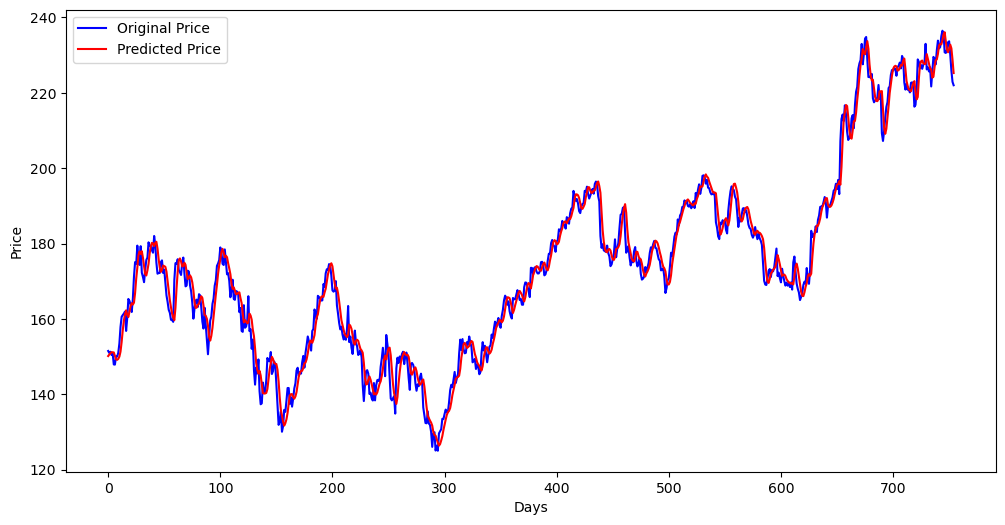

In [80]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

(140.0, 220.0)

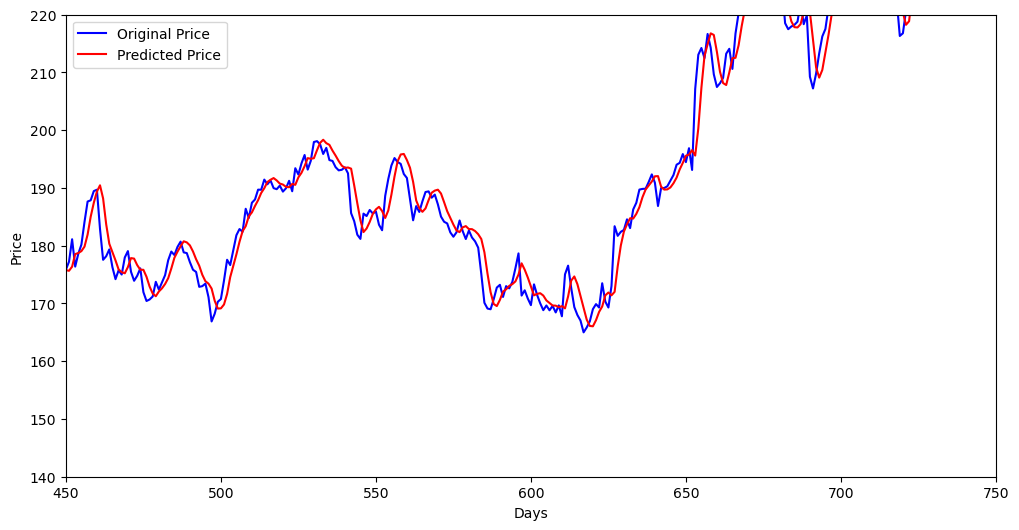

In [79]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [85]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
mse = mean_squared_error(y_test, y_predicted)
print(f"MSE = {mse}")

MSE = 13.06910192454573


In [84]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE = {rmse}")

RMSE = 3.6151212876673626


In [86]:
# R-Squared (R2)
r2 = r2_score(y_test, y_predicted)
print(f"R2 = {r2}")

R2 = 0.9797002974892359


In [ ]:
            # Root Mean Squared Error (RMSE)
            rmse = np.sqrt(mse)

            # R-Squared (R2)
            r2 = r2_score(y_test, y_predicted)

            'rmse': rmse,
            'r2': r2
